# PREVIEW DATASET
Data set ini terdiri dari data transaksi kartu kredit sebuah bank. Di dalamnya, terdapat status apakah transaksi tersebut fraud atau tidak. Objektif dari notebook ini adalah membuat sebuah model yang dapat memprediksi apakah sebuah transaksi merupakan fraud atau tidak menggunakan data-data yang ada. Kolom-kolom yang ada pada datasetnya adalah sebagai berikut:

- X : nomor transaksi
- id_tanggal_transaksi_awal : id tanggal transaksi
- tanggal_transaksi_awal : tanggal nasabah melakukan transaksi
- tipe_kartu : Tipe kelas kartu seperti platinum, gold, silver, dll
- id_merchant : ID merchant
- nama_merchant : Toko/tempat melakukan transaksi
- tipe_mesin : Mesin transaksi yang digunakan untuk transaksi
- tipe_transaksi : Tipe transaksi seperti pembayaran, penarikan, transfer, dll
- nama_transaksi : Sama seperti tipe transaksi
- nilai_transaksi : Nominal transaksi yang dilakukan oleh nasabah
- id_negara : ID negara dilakukannya transaksi
- nama_negara : Nama negara dilakukannya transaksi
- nama_kota : Nama kota dilakukannya transaksi
- lokasi_mesin : Tempat mesin transaksi berada
- pemilik_mesin : Pemilik dari mesin transaksi
- waktu_transaksi : Waktu dilakukannya transaksi
- kuartal_transaksi : Kuartal dilakukannya transaksi
- kepemilikan_kartu : Kepemilikan kartu (pribadi/perusahaan)
- nama_channel : Nama channel
- id_channel : ID channel
- flag_transaksi_finansial : Flag untuk transaksi yang mencurigakan
- status_transaksi : Status transaksi sukses
- bank_pemilik_kartu : Bank pemilik kartu
- rata_rata_nilai_transaksi : Rata-rata nilai transaksi yang dilakukan oleh nasabah
- maksimum_nilai_transaksi : Nilai transaksi maksimum nasabah yang tercatat
- minimum_nilai_transaksi : Nilai transaksi minimum nasabah yang tercatat
- rata_rata_jumlah_transaksi : Rata-rata banyak transaksi yang dilakukan oleh nasabah
- flag_transaksi_fraud : Penanda apakah suatu transaksi fraud atau tidak

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_original = pd.read_csv("data/fraud_train.txt", sep=",")
df = df_original.copy()

# PRAPROSES

In [3]:
df.head(10)

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,...,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,...,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,...,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,...,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,...,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0
5,6947,2457413,2457453,111,-2,1798,16834,385,11,100000.0,...,1,9,False,3,999,2.742308e+05,1300000.0,20600.0,1.69,0
6,14131,2457615,2457640,93,-2,1798,1850104,385,11,2000000.0,...,1,9,False,3,999,2.326051e+06,40000000.0,100000.0,1.79,0
7,4811,2457429,2457463,0,-2,1798,2435842,385,11,150000.0,...,1,9,False,3,999,3.924000e+05,4320000.0,25000.0,1.41,0
8,1458,2457371,2457453,93,-2,1798,1370214,159,19,50000.0,...,1,9,False,3,999,7.512486e+05,3550000.0,25000.0,1.88,0
9,4123,2457320,2457365,93,-2,1798,1942704,26,10,1250000.0,...,1,9,False,3,999,9.893071e+05,28000000.0,10000.0,3.64,0


Semua data merupakan tipe data numerik. Hal ini karena dataset ini bersifat private sehingga akses terhadap data sebenarnya dimasking terlebih dahulu agar data sebenarnya tidak dapat diakses oleh orang yang tidak berwenang.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X                           13125 non-null  int64  
 1   id_tanggal_transaksi_awal   13125 non-null  int64  
 2   tanggal_transaksi_awal      13125 non-null  int64  
 3   tipe_kartu                  13125 non-null  int64  
 4   id_merchant                 13125 non-null  int64  
 5   nama_merchant               13125 non-null  int64  
 6   tipe_mesin                  13125 non-null  int64  
 7   tipe_transaksi              13125 non-null  int64  
 8   nama_transaksi              13125 non-null  int64  
 9   nilai_transaksi             13125 non-null  float64
 10  id_negara                   13125 non-null  int64  
 11  nama_negara                 13125 non-null  int64  
 12  nama_kota                   13125 non-null  int64  
 13  lokasi_mesin                131

In [5]:
df.shape

(13125, 28)

In [6]:
df.nunique()

X                             8793
id_tanggal_transaksi_awal      360
tanggal_transaksi_awal         452
tipe_kartu                      14
id_merchant                   1122
nama_merchant                 1105
tipe_mesin                    5341
tipe_transaksi                  20
nama_transaksi                  20
nilai_transaksi               1425
id_negara                       13
nama_negara                     12
nama_kota                      229
lokasi_mesin                  5814
pemilik_mesin                 1666
waktu_transaksi               7952
kuartal_transaksi                4
kepemilikan_kartu                2
nama_channel                     5
id_channel                       4
flag_transaksi_finansial         1
status_transaksi                 1
bank_pemilik_kartu               1
rata_rata_nilai_transaksi     3090
maksimum_nilai_transaksi       804
minimum_nilai_transaksi        754
rata_rata_jumlah_transaksi     371
flag_transaksi_fraud             2
dtype: int64

### Label encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['flag_transaksi_fraud'] = label_encoder.fit_transform(df['flag_transaksi_fraud'])
list(label_encoder.classes_)

[0, 1]

### Cek data null/nan

In [8]:
df.isna().sum()

X                              0
id_tanggal_transaksi_awal      0
tanggal_transaksi_awal         0
tipe_kartu                     0
id_merchant                    0
nama_merchant                  0
tipe_mesin                     0
tipe_transaksi                 0
nama_transaksi                 0
nilai_transaksi                0
id_negara                      0
nama_negara                    0
nama_kota                      0
lokasi_mesin                   0
pemilik_mesin                  0
waktu_transaksi                0
kuartal_transaksi              0
kepemilikan_kartu              0
nama_channel                   0
id_channel                     0
flag_transaksi_finansial       0
status_transaksi               0
bank_pemilik_kartu             0
rata_rata_nilai_transaksi     21
maksimum_nilai_transaksi      21
minimum_nilai_transaksi       21
rata_rata_jumlah_transaksi    21
flag_transaksi_fraud           0
dtype: int64

In [9]:
df = df.dropna()

### Cek relasi antarkolom

<Axes: >

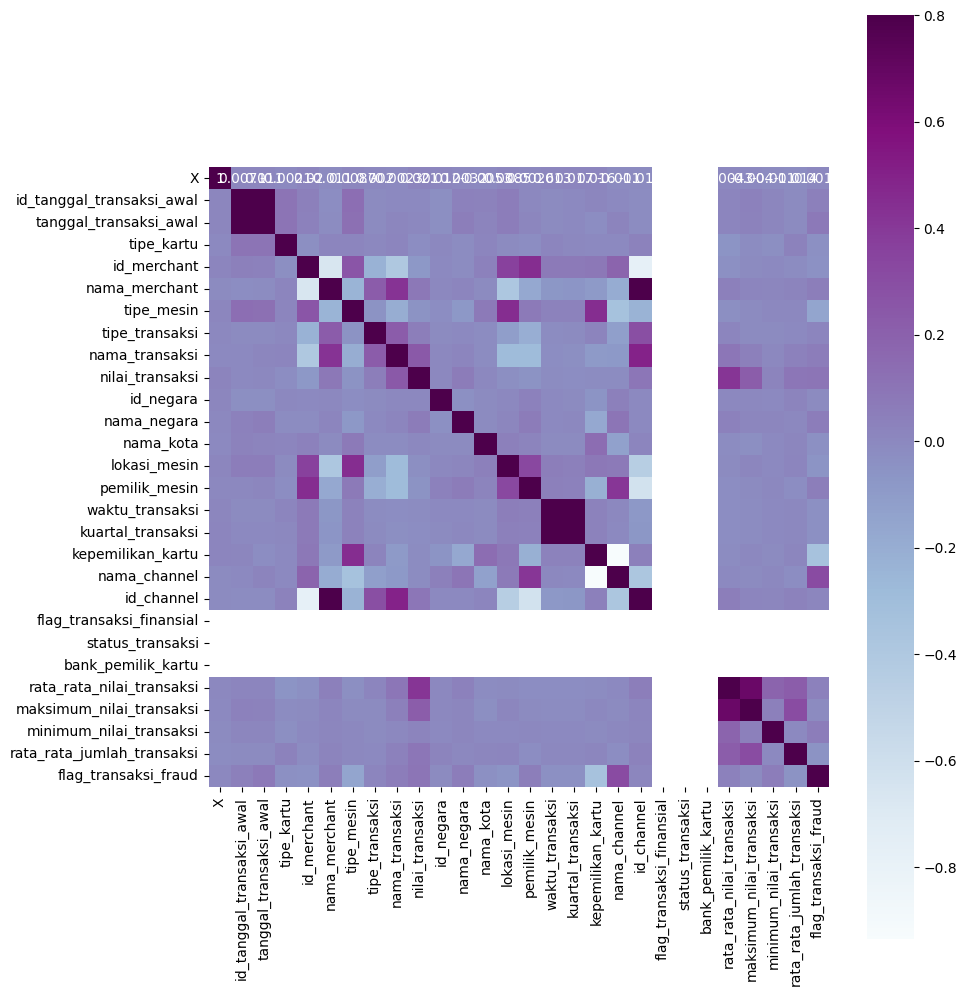

In [10]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True)

### Drop kolom

Hapus kolom yang tidak digunakan untuk menghindari noise.

In [11]:
df.drop(['X', 'id_tanggal_transaksi_awal', 'id_merchant', 'id_negara', 'id_channel', 'flag_transaksi_finansial', 'tipe_mesin', 'status_transaksi', 'bank_pemilik_kartu', 'kepemilikan_kartu', 'maksimum_nilai_transaksi', 'minimum_nilai_transaksi'], axis=1, inplace=True)

### Ubah tipe data

Ubah tipe data beberapa kolom yang bersifat kategori menjadi category

In [12]:
to_category = ['tipe_kartu', 'nama_negara', 'nama_kota', 'nama_merchant', 'lokasi_mesin', 'pemilik_mesin', 'tipe_transaksi', 'nama_transaksi', 'kuartal_transaksi', 'nama_channel']
df[to_category] = df[to_category].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13104 entries, 0 to 13124
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tanggal_transaksi_awal      13104 non-null  int64   
 1   tipe_kartu                  13104 non-null  category
 2   nama_merchant               13104 non-null  category
 3   tipe_transaksi              13104 non-null  category
 4   nama_transaksi              13104 non-null  category
 5   nilai_transaksi             13104 non-null  float64 
 6   nama_negara                 13104 non-null  category
 7   nama_kota                   13104 non-null  category
 8   lokasi_mesin                13104 non-null  category
 9   pemilik_mesin               13104 non-null  category
 10  waktu_transaksi             13104 non-null  int64   
 11  kuartal_transaksi           13104 non-null  category
 12  nama_channel                13104 non-null  category
 13  rata_rata_nilai_

### Scaling

Karena adanya perbedaan rentang di beberapa kolom yang berkaitan, maka kolom-kolom tersebut harus disamakan rentangnya agar model dapat dibentuk dengan baik.

In [14]:
from sklearn.preprocessing import StandardScaler

stc = StandardScaler()

df['scaled_nilai_transaksi'] = stc.fit_transform(df['nilai_transaksi'].values.reshape(-1,1))
df['scaled_mean_nilai_transaksi'] = stc.fit_transform(df['rata_rata_nilai_transaksi'].values.reshape(-1,1))
df['scaled_tanggal_transaksi_awal'] = stc.fit_transform(df['tanggal_transaksi_awal'].values.reshape(-1,1))
df['scaled_waktu_transaksi'] = stc.fit_transform(df['waktu_transaksi'].values.reshape(-1,1))

df.drop(['nilai_transaksi','rata_rata_nilai_transaksi', 'tanggal_transaksi_awal', 'waktu_transaksi'], axis = 1, inplace = True )

df.head()

,tipe_kartu,nama_merchant,tipe_transaksi,nama_transaksi,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,kuartal_transaksi,nama_channel,rata_rata_jumlah_transaksi,flag_transaksi_fraud,scaled_nilai_transaksi,scaled_mean_nilai_transaksi,scaled_tanggal_transaksi_awal,scaled_waktu_transaksi
0,111,1798,26,10,5,265,4137,613,4,1,2.73,0,0.311917,-0.021980,1.703490,1.149605
1,111,1798,156,12,5,121,1264,2196,2,5,2.33,1,0.417643,0.003394,-0.308310,-1.373423
2,2,1798,156,12,5,101,1283,2049,3,5,2.40,0,-0.040501,9.774979,0.656251,0.027352
3,103,249,58,6,5,239,7049,588,3,2,1.98,0,-0.350629,-0.450366,1.887216,0.338536
4,0,1798,26,10,5,69,3425,613,3,1,1.46,0,-0.410540,-0.515119,-1.429039,0.092571


### Cek outliers

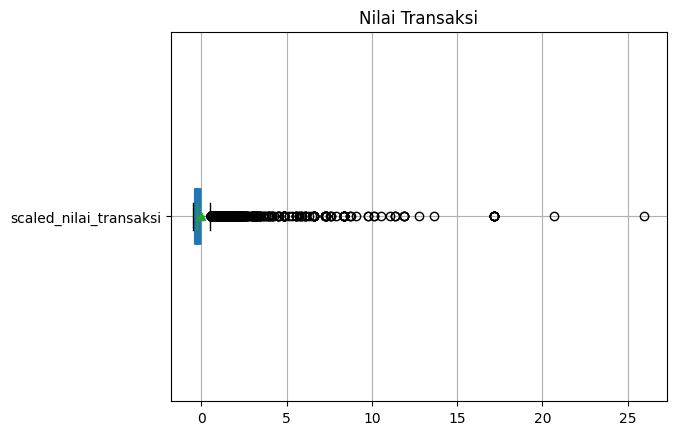

In [15]:
df.boxplot(column=['scaled_nilai_transaksi'], vert=False, patch_artist=True, notch=True, showmeans=True)
plt.title("Nilai Transaksi")
plt.show()

In [16]:
# Calculate the IQR for the specified column
Q1 = df['scaled_nilai_transaksi'].quantile(0.25)
Q3 = df['scaled_nilai_transaksi'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['scaled_nilai_transaksi'] >= lower_bound) & (df['scaled_nilai_transaksi'] <= upper_bound)]

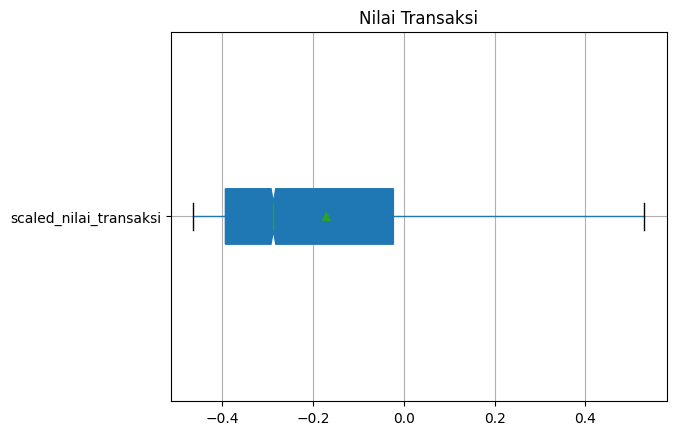

In [17]:
df.boxplot(column=['scaled_nilai_transaksi'], vert=False, patch_artist=True, notch=True, showmeans=True)
plt.title("Nilai Transaksi")
plt.show()

# Membuat model

In [18]:
df_train = df.copy()

### Cek keseimbangan data

In [19]:
df_train.flag_transaksi_fraud.value_counts()

0    11426
1      800
Name: flag_transaksi_fraud, dtype: int64

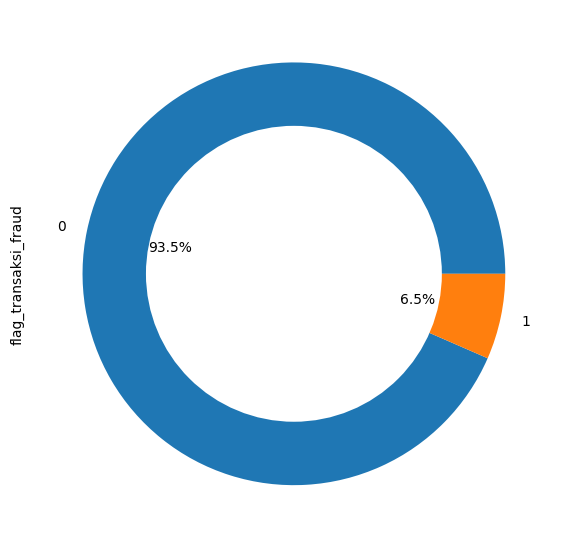

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df_train["flag_transaksi_fraud"].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

terjadi data imbalance, di mana data yang fraud berjumlah 800 (6.5%) dan yang tidak fraud 11426 (93.5%). Hal ini menandakan data yang fraud jauh lebih sedikit daripada yang tidak fraud. Kita harus membuat data menjadi balance dengan hanya mengambil 800 data yang tidak fraud secara random.

In [21]:
df_train = df_train.sample(frac=1)

# We take all the fraud transactions from the original dataset
fraud_df = df_train[df_train['flag_transaksi_fraud'] == 1]
# We just want to take 800 random choices of valid transactions, in order to create the new dataframe
valid_df = df_train[df_train['flag_transaksi_fraud'] == 0]
valid_df = valid_df.loc[np.random.choice(valid_df.index, 800, replace=False)]
# We join them
normal_distributed_df = pd.concat([fraud_df, valid_df],axis=0)

# We shuffle the new dataframe and make it normal distributed
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df = pd.DataFrame(new_df)
df_train = new_df

In [22]:
df_train.flag_transaksi_fraud.value_counts()
# df.shape

1    800
0    800
Name: flag_transaksi_fraud, dtype: int64

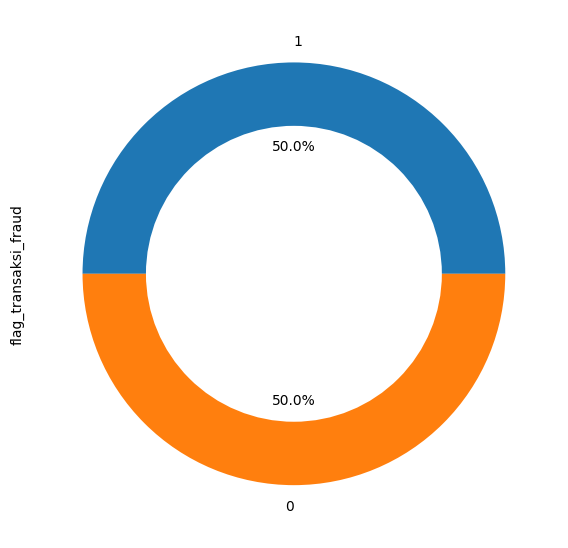

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df_train['flag_transaksi_fraud'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

### Import library yang dibutuhkan

In [24]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import pickle
import xgboost as xgb
import joblib

### Pindahkan data
Pindahkan kolom-kolom selain flag_transaksi_fraud ke variabel X, dan kolom flag_transaksi_fraud ke variabel Y

In [25]:
X = df_train.drop("flag_transaksi_fraud",axis=1)
Y = df_train[['flag_transaksi_fraud']]

### One-hot encoding
Model-model yang kami gunakan hanya menerima input numerik. Oleh karena itu, untuk mengubah kolom-kolom kategori menjadi numerik, dibutuhkan satu teknik yang bernama one-hot encoding, yaitu merubah kolom kategori menjadi numerik. Kita dapat menggunakan fungsi get_dummies dari pandas.

In [26]:
X = pd.get_dummies(X)

### Data split
Pisahkan data training dan data validasi. komposisinya adalah data training 80% dan data validasi 20%.

In [27]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=1)

### Naive Bayes

In [28]:
# Naive Bayes
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
acc_NB = accuracy_score(Y_val, Y_pred)
print("Akurasi {}".format(acc_NB))
print(classification_report(Y_val, Y_pred))

Akurasi 0.615625
              precision    recall  f1-score   support

           0       0.59      0.89      0.71       167
           1       0.73      0.31      0.44       153

    accuracy                           0.62       320
   macro avg       0.66      0.60      0.57       320
weighted avg       0.65      0.62      0.58       320



### Decision Tree

In [29]:
# Decision Tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
acc_DT = accuracy_score(Y_val, Y_pred)
print("Akurasi {}".format(acc_DT))
print(classification_report(Y_val, Y_pred))

Akurasi 0.740625
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       167
           1       0.74      0.70      0.72       153

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



### Random Forest

In [30]:
clf = RandomForestClassifier(n_estimators=50, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
acc_RF = accuracy_score(Y_val, Y_pred)
print("Akurasi {}".format(acc_RF))
print(classification_report(Y_val, Y_pred))

Akurasi 0.746875
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       167
           1       0.81      0.62      0.70       153

    accuracy                           0.75       320
   macro avg       0.76      0.74      0.74       320
weighted avg       0.76      0.75      0.74       320



### Model xgboost

In [31]:
# Menjalankan XGBoost
clf = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = "mlogloss", 
                        max_depth = 10, gamma=0.8, subsample = 0.9,learning_rate=0.09, 
                        n_estimators = 50, seed = 27,
                        colsample_bytree = 0.9, nthread=4)

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
acc_XGB = accuracy_score(Y_val, Y_pred)

# Mencetak hasil dari XGBoost
print("Akurasi {}".format(acc_XGB))
print(classification_report(Y_val, Y_pred))

Akurasi 0.7875
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       167
           1       0.81      0.73      0.77       153

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



### Confusion matrix XGBoost

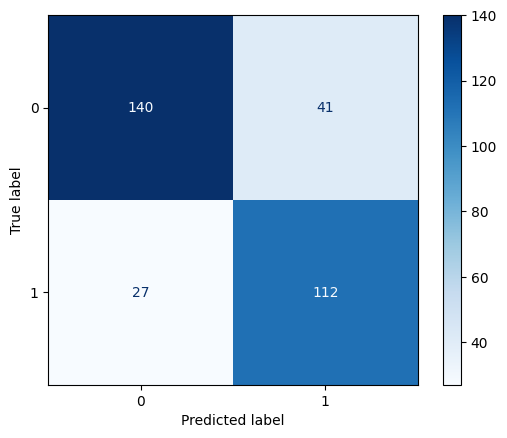

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(Y_pred,Y_val)

# Menampilkan matriks kebingungan menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Melihat kolom yang paling berpengaruh/penting untuk model

In [34]:
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)


                        importance
nama_channel_5            0.224628
nama_transaksi_12         0.191973
tipe_kartu_138            0.025579
scaled_nilai_transaksi    0.023541
kuartal_transaksi_1       0.022757
...                            ...
lokasi_mesin_2264         0.000000
lokasi_mesin_2263         0.000000
lokasi_mesin_2262         0.000000
lokasi_mesin_2261         0.000000
lokasi_mesin_4308         0.000000

[8889 rows x 1 columns]
